In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
import seaborn as sns
import pybaseball as pb
import pandas as pd


In [13]:
# import pybaseball as pb

# batting_stats_2025 = pb.batting_stats(start_season=2025, end_season=2025)

# batting_stats_2025 = batting_stats_2025[[
#     'IDfg', 'Season', 'Name', 'Team', 'Age',  # Basic Identifiers
#     'G', 'AB', 'PA', 'H', '1B', '2B', '3B', 'HR',  # Volume Metrics
#     'AVG', 'SLG', 'ISO', 'OBP', 'OPS',  # Rate and Power Metrics
#     'BB%', 'K%', 'BB/K', 'wOBA', 'wRC', 'wRC+',  # Advanced Metrics
#     'LD%', 'GB%', 'FB%', 'HR/FB',  # Batted Ball Profile
#     'Pull%', 'Cent%', 'Oppo%', 'Soft%', 'Med%', 'Hard%',  # Contact Quality
#     'EV', 'LA', 'Barrels', 'Barrel%', 'HardHit%', 'maxEV'  # Statcast (if available)
# ]]

# print(batting_stats_2025.head())
# batting_stats_2025.to_csv('batting_stats_2025.csv', index=False)


In [14]:
# import pandas as pd
# import pybaseball as pb

# # Get all batting stats from 1900 to 2025
# all_years = []
# for year in range(1900, 2026):
#     try:
#         data = pb.batting_stats(start_season=year, end_season=year)
#         data['Season'] = year
#         all_years.append(data)
#     except Exception as e:
#         print(f"Failed to load data for {year}: {e}")

# # Combine into one DataFrame
# batting_stats_all = pd.concat(all_years, ignore_index=True)

# # Filter only the relevant columns
# columns_to_keep = [
#     'IDfg', 'Season', 'Name', 'Team', 'Age',
#     'G', 'AB', 'PA', 'H', '1B', '2B', '3B', 'HR',
#     'AVG', 'SLG', 'ISO', 'OBP', 'OPS',
#     'BB%', 'K%', 'BB/K', 'wOBA', 'wRC', 'wRC+',
#     'LD%', 'GB%', 'FB%', 'HR/FB',
#     'Pull%', 'Cent%', 'Oppo%', 'Soft%', 'Med%', 'Hard%',
#     'EV', 'LA', 'Barrels', 'Barrel%', 'HardHit%', 'maxEV'
# ]

# # Some older seasons may be missing advanced/statcast stats — drop missing columns if needed
# columns_present = [col for col in columns_to_keep if col in batting_stats_all.columns]
# batting_stats_all = batting_stats_all[columns_present]

# # Save to CSV
# batting_stats_all.to_csv('batting_stats_1900_2025.csv', index=False)

# print("Data from 1900–2025 saved to 'batting_stats_1900_2025.csv'")


In [15]:
#increasing power era 1920 to 1960

batting_stats_all = pd.read_csv('batting_stats_1900_2025.csv')

statcast_era = batting_stats_all[(batting_stats_all['Season'] >= 2015) & (batting_stats_all['Season'] <= 2025)]
filtered_incr_power_era = statcast_era.dropna(axis=1, how='all')
filtered_incr_power_era


,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,...,Oppo%,Soft%,Med%,Hard%,EV,LA,Barrels,Barrel%,HardHit%,maxEV
14052,11579,2015,Bryce Harper,WSN,22,153,521,654,172,91,...,0.208,0.119,0.472,0.409,91.4,14.6,48.0,0.122,0.477,116.0
14053,10155,2015,Mike Trout,LAA,23,159,575,682,172,93,...,0.287,0.116,0.476,0.408,92.9,14.0,68.0,0.161,0.486,117.7
14054,5038,2015,Josh Donaldson,TOR,29,158,620,711,184,100,...,0.236,0.144,0.483,0.373,92.5,10.4,57.0,0.114,0.465,113.6
14055,4314,2015,Joey Votto,CIN,31,158,545,695,171,107,...,0.260,0.095,0.522,0.383,90.2,11.5,39.0,0.095,0.425,109.3
14056,9218,2015,Paul Goldschmidt,ARI,27,159,567,695,182,109,...,0.303,0.102,0.485,0.414,92.0,12.9,52.0,0.123,0.465,114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15590,25845,2025,Michael Toglia,COL,26,28,102,109,22,15,...,0.210,0.129,0.516,0.355,89.7,15.1,6.0,0.097,0.403,109.6
15591,13145,2025,Josh Bell,WSN,32,27,98,110,14,9,...,0.227,0.213,0.520,0.267,86.4,9.4,6.0,0.080,0.347,110.5
15592,13621,2025,Jeimer Candelario,CIN,31,22,80,91,9,5,...,0.208,0.132,0.604,0.264,87.3,11.4,4.0,0.075,0.283,107.5
15593,26197,2025,Andrew Vaughn,CHW,27,27,106,113,17,11,...,0.280,0.110,0.537,0.354,91.8,13.4,13.0,0.159,0.524,110.5


In [16]:
era_stats = statcast_era.copy()
era_hr = era_stats['HR'].sum()
era_ab = era_stats['AB'].sum()
era_stats['HR_per_AB'] = era_stats['HR'] / era_stats['AB']
era_stats['H_per_AB'] = era_stats['H'] / era_stats['AB']
era_summary = era_stats[['HR_per_AB', 'H_per_AB', 'SLG', 'ISO']].describe()
print(era_summary)
print(f"Home Runs in Dead Ball Era: {era_hr}")
print(f"At Bats in Dead Ball Era: {era_ab}")
print(f"Hits in Dead Ball Era: {era_stats['H'].sum()}")

total_hits = era_stats[['1B', '2B', '3B', 'HR']].sum()
hit_dist = total_hits / total_hits.sum()

print(hit_dist)


         HR_per_AB     H_per_AB          SLG          ISO
count  1543.000000  1543.000000  1543.000000  1543.000000
mean      0.040370     0.264014     0.447166     0.183141
std       0.018816     0.031730     0.071060     0.057849
min       0.000000     0.112500     0.213000     0.030000
25%       0.027145     0.245107     0.401000     0.144000
50%       0.039216     0.264120     0.441000     0.179000
75%       0.052683     0.284255     0.490000     0.221000
max       0.108772     0.412281     0.728000     0.379000
Home Runs in Dead Ball Era: 28824
At Bats in Dead Ball Era: 711185
Hits in Dead Ball Era: 189577
1B    0.629765
2B    0.199803
3B    0.018388
HR    0.152044
dtype: float64


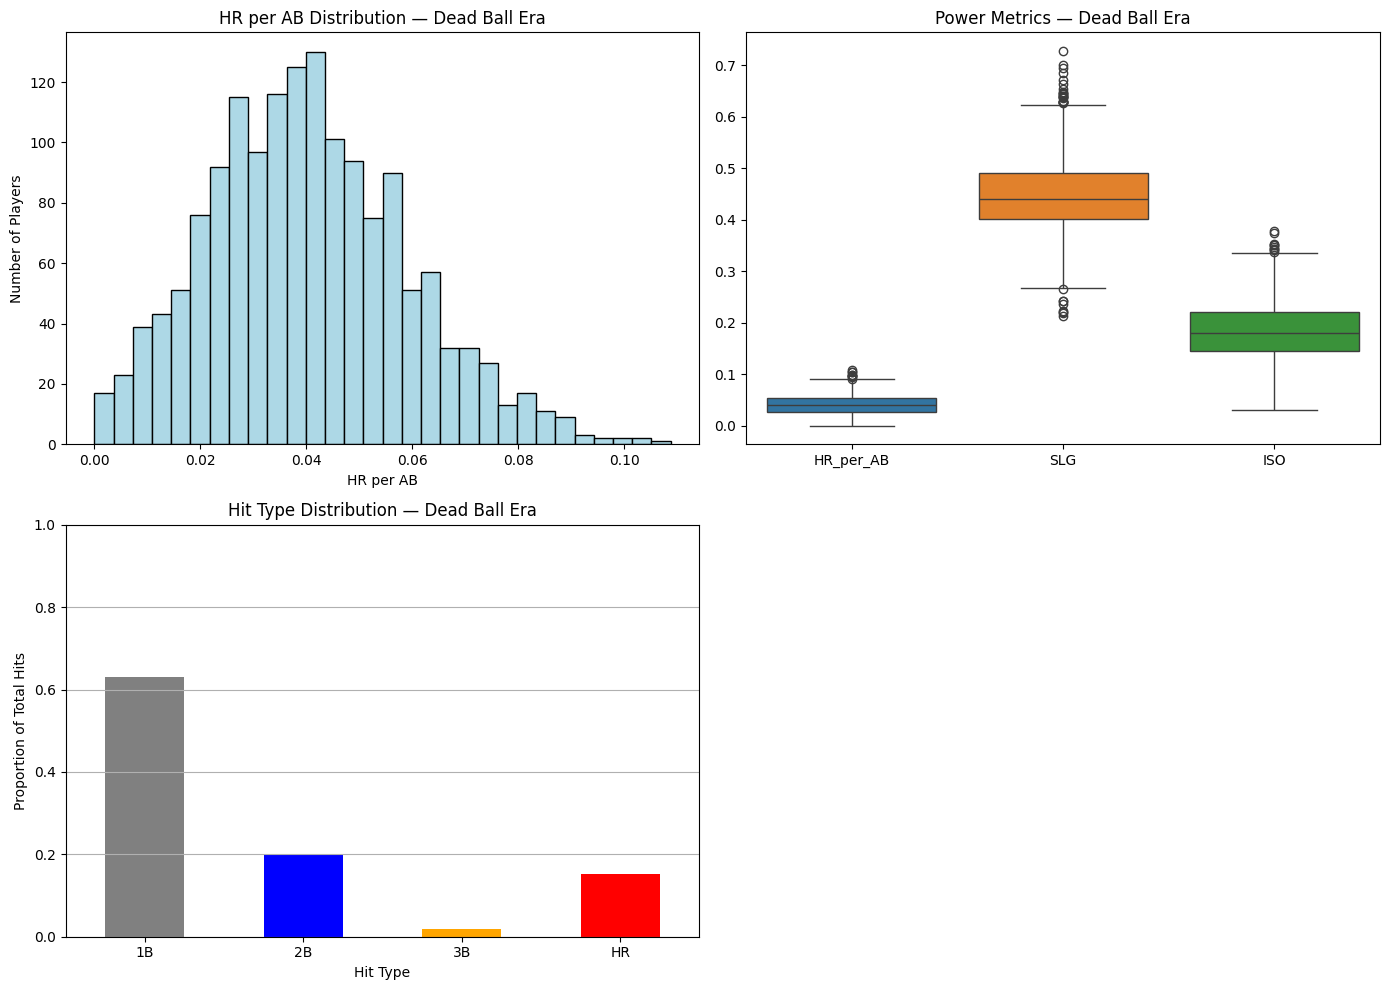

In [17]:
# Create a 2x2 layout
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Histogram of HR per AB
axes[0, 0].hist(era_stats['HR_per_AB'], bins=30, color='lightblue', edgecolor='black')
axes[0, 0].set_title("HR per AB Distribution — Dead Ball Era")
axes[0, 0].set_xlabel("HR per AB")
axes[0, 0].set_ylabel("Number of Players")

# Plot 2: Boxplot of Power Metrics
sns.boxplot(data=era_stats[['HR_per_AB', 'SLG', 'ISO']], ax=axes[0, 1])
axes[0, 1].set_title("Power Metrics — Dead Ball Era")

# Plot 3: Bar chart of Hit Type Distribution
hit_dist.plot(kind='bar', color=['gray', 'blue', 'orange', 'red'], ax=axes[1, 0])
axes[1, 0].set_title('Hit Type Distribution — Dead Ball Era')
axes[1, 0].set_ylabel('Proportion of Total Hits')
axes[1, 0].set_xlabel('Hit Type')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].tick_params(axis='x', rotation=0)
axes[1, 0].grid(axis='y')

axes[1, 1].axis('off')

plt.tight_layout()
plt.show()


In [18]:
era_clean = era_stats.dropna(subset=['ISO', 'SLG', 'HR_per_AB'])

X = era_clean[['SLG', 'HR_per_AB']]
y = era_clean['ISO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

r2 = model.score(X_test, y_test)
print(f"R² Score: {r2:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficients: {model.coef_}")
print(f"Feature names: {X.columns.tolist()}")


R² Score: 0.9697
Intercept: -0.0348
Coefficients: [0.30514096 2.01681952]
Feature names: ['SLG', 'HR_per_AB']


C:\Users\sdeck\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


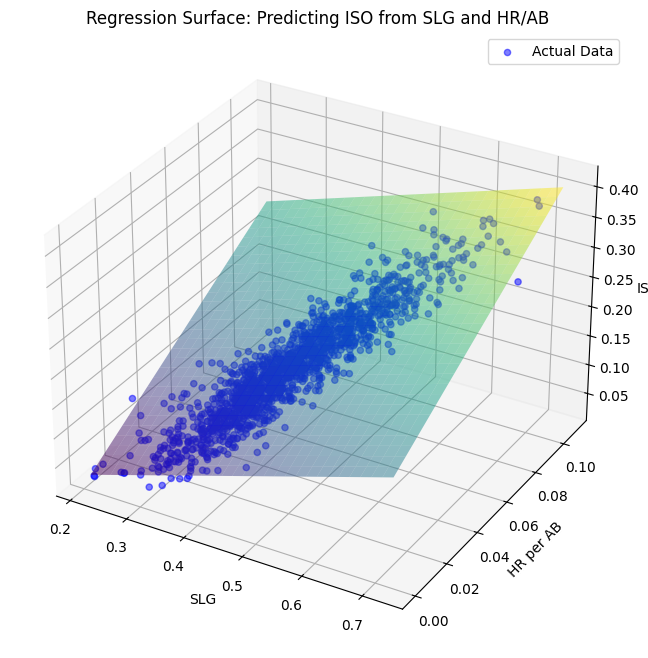

In [19]:

era_clean = era_stats.dropna(subset=['ISO', 'SLG', 'HR_per_AB'])
X = era_clean[['SLG', 'HR_per_AB']]
y = era_clean['ISO']


model = LinearRegression()
model.fit(X, y)

slg_range = np.linspace(X['SLG'].min(), X['SLG'].max(), 30)
hrab_range = np.linspace(X['HR_per_AB'].min(), X['HR_per_AB'].max(), 30)
slg_grid, hrab_grid = np.meshgrid(slg_range, hrab_range)
iso_pred = model.predict(np.c_[slg_grid.ravel(), hrab_grid.ravel()]).reshape(slg_grid.shape)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['SLG'], X['HR_per_AB'], y, color='blue', alpha=0.5, label='Actual Data')
ax.plot_surface(slg_grid, hrab_grid, iso_pred, alpha=0.5, cmap='viridis')

ax.set_xlabel('SLG')
ax.set_ylabel('HR per AB')
ax.set_zlabel('ISO')
ax.set_title('Regression Surface: Predicting ISO from SLG and HR/AB')
plt.legend()
plt.show()


In [20]:
empty_columns = [col for col in statcast_era.columns if statcast_era[col].isna().all()]
print("Empty columns:", empty_columns)

Empty columns: []
